<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/klastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install Sastrawi


In [42]:
!pip install beautifulsoup4

In [43]:
import requests
from bs4 import BeautifulSoup# Buat request ke website
r = requests.get('https://bola.kompas.com/')
soup = BeautifulSoup(r.content, 'html.parser')# Buat object untuk parse((mengurai) format HTML 
link = []
# Ambil semua tautan berita yang menarik
for i in soup.find('div', {'class':'most__wrap'}).find_all('a'): 
    
    i['href'] = i['href'] + '?page=all'
    link.append(i['href'])
    #dari tiap tautan ambil paragraph, kombinasikan tiap paragraph
    #simpan ke dalam larik documents
    
documents = []
for i in link:
    # Buat request ke tautan
    r = requests.get(i)
    # Initialize BeautifulSoup object untuk parse/mengurai isi 
    soup = BeautifulSoup(r.content, 'html.parser')
    # ambil semua paragraph dan masukkan ke dalam larik sen
    sen = []
    for i in soup.find('div', {'class':'read__content'}).find_all('p'):
        sen.append(i.text)
    # tabahkan semua paragraph yang sudah digabungkan ke dalam larik documents
    documents.append(' '.join(sen))

In [44]:
for d in documents:
    print(d)

KOMPAS.com - Hasil drawing atau undian grup BWF World Tour Finals 2021 telah dilakukan di Bali International Convention Center, Nusa Dua, Selasa (30/11/2021) pagi WIB. Adapun sebanyak empat wakil Merah Putih di tiga nomor ganda berbeda melaju ke BWF World Tour Finals 2021, yang akan menutup rangkaian Indonesia Badminton Festival (IBF) di Bali. Wakil-wakil Indonesia yang lolos adalah dua ganda putra Marcus Fernaldi Gideon/Kevin Sanjaya Sukamuljo dan Pramudya Kusumawardana/Yeremia Erich Yoche Yacob Rambitan. Lalu, ganda putri Greysia Polii/Apriyani Rahayu yang lolos via jalur juara Olimpiade Tokyo 2020. Baca juga: Cerita Pram/Yere Lolos BWF World Tour Finals: Chat Marcus, Nonton Sambil Main Tenis Meja... Terakhir ada Praveen Jordan/Melati Daeva Oktavianti di sektor ganda campuran. Di sektor ganda putra, Marcus/Kevin yang merupakan pasangan nomor 1 dunia ini mendapatkan lawan yang cukup berat. Dapatkan informasi, inspirasi dan insight di email kamu.Daftarkan email The Minions tergabung di

In [45]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in documents:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [46]:
documents_clean[0:5]

['kompas com hasil drawing undi grup bwf world tour finals laku bal international convention center nusa selasa pagi wib adapun banyak empat wakil merah putih tiga nomor ganda beda laju bwf world tour finals tutup rangkai indonesia badminton festival ibf bal wakil indonesia lolos ganda putra marcus fernaldi gideon kevin sanjaya sukamuljo pramudya kusumawardana yeremia erich yoche yacob rambitan lalu ganda putri greysia polii apriyani rahayu lolos via jalur juara olimpiade tokyo baca cerita pram yere lolos bwf world tour finals chat marcus nonton main tenis meja akhir praveen jordan melati daeva oktavianti sektor ganda campur sektor ganda putra marcus kevin rupa pasang nomor dunia lawan cukup berat dapat informasi inspirasi insight email kamu daftar email the minions gabung grup a sama pasang baik india denmark satwiksairaj rankireddy chirag shetty kim astrup anders skaarup rasmussen adapun lawan potensi jadi tantang besar marcus kevin grup a lee wang chi lin taiwan baca profil yeo jia 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

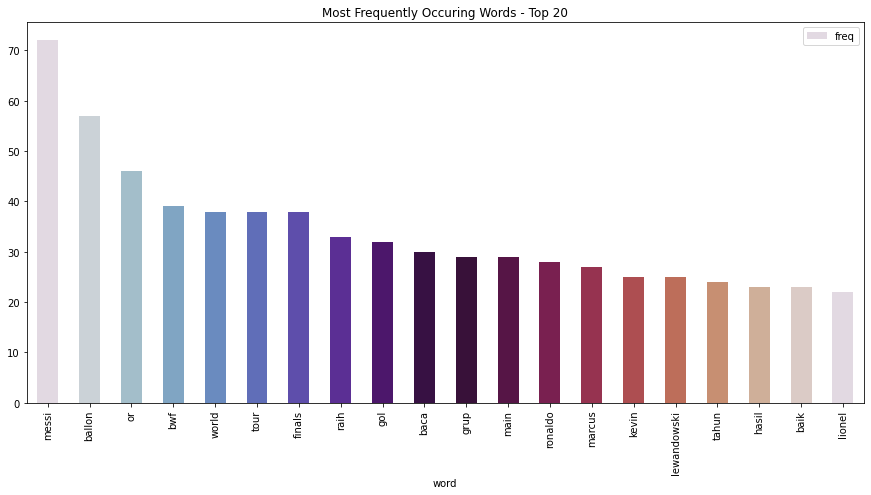

In [48]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [49]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [50]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 bwf
 tour
 finals
 world
 grup
 marcus
 kevin
 kobayashi
 indonesia
 hoki
Cluster 1:
 messi
 ballon
 or
 raih
 lewandowski
 tahun
 lionel
 main
 gol
 trofi
Cluster 2:
 united
 ronaldo
 liga
 arsenal
 gol
 poin
 bal
 ke
 klasemen
 persiraja




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [2]
Cluster number : [2]


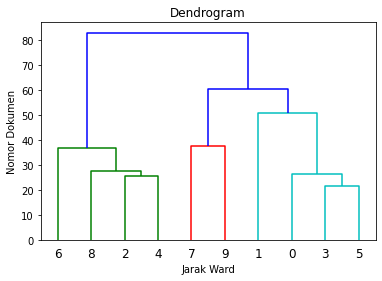

In [52]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

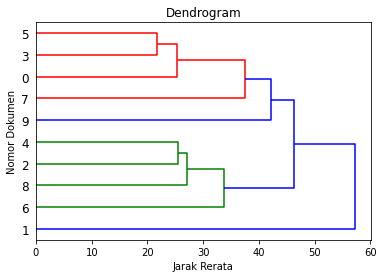

In [53]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[2 3 0 2 0 2 5 4 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


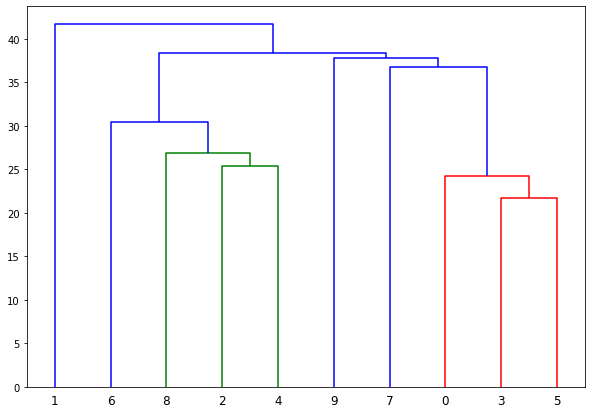

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

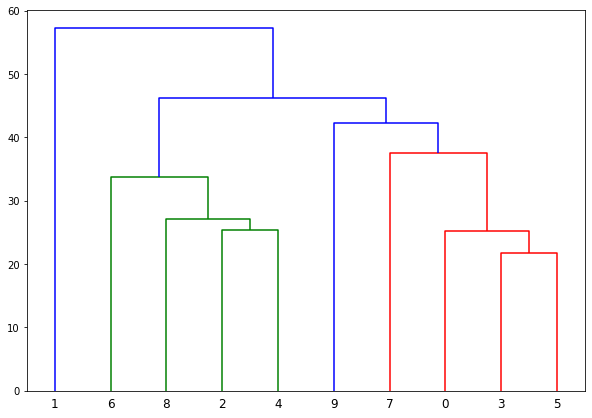

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()